In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

**A) Train test split based on given criteria and feature distribution histograms for train and test dataset.**



*   Drop the features supposed to be ignored and fill missing values by mode.
*   Create seperate dataframes from each value of num and select 20 percent for test dataset.
*   Plot histograms for each feature in both train and test data set.



In [135]:
df = pd.read_csv('/content/data.csv')

df.rename(columns ={'num       ': 'num'},inplace=True)
df.drop(['slope','ca','thal'],axis=1, inplace=True)
df.replace('?', np.nan, inplace=True)

for i in ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [136]:
num_0 = df[df['num'] == 0]
num_1 = df[df['num'] == 1]

train_num_0, test_num_0 = train_test_split(num_0, test_size=0.2)
train_num_1, test_num_1 = train_test_split(num_1, test_size=0.2)

test_data = pd.concat([test_num_0, test_num_1])
train_data = pd.concat([train_num_0, train_num_1])

print(test_data.shape)
print(train_data.shape)

(60, 11)
(234, 11)


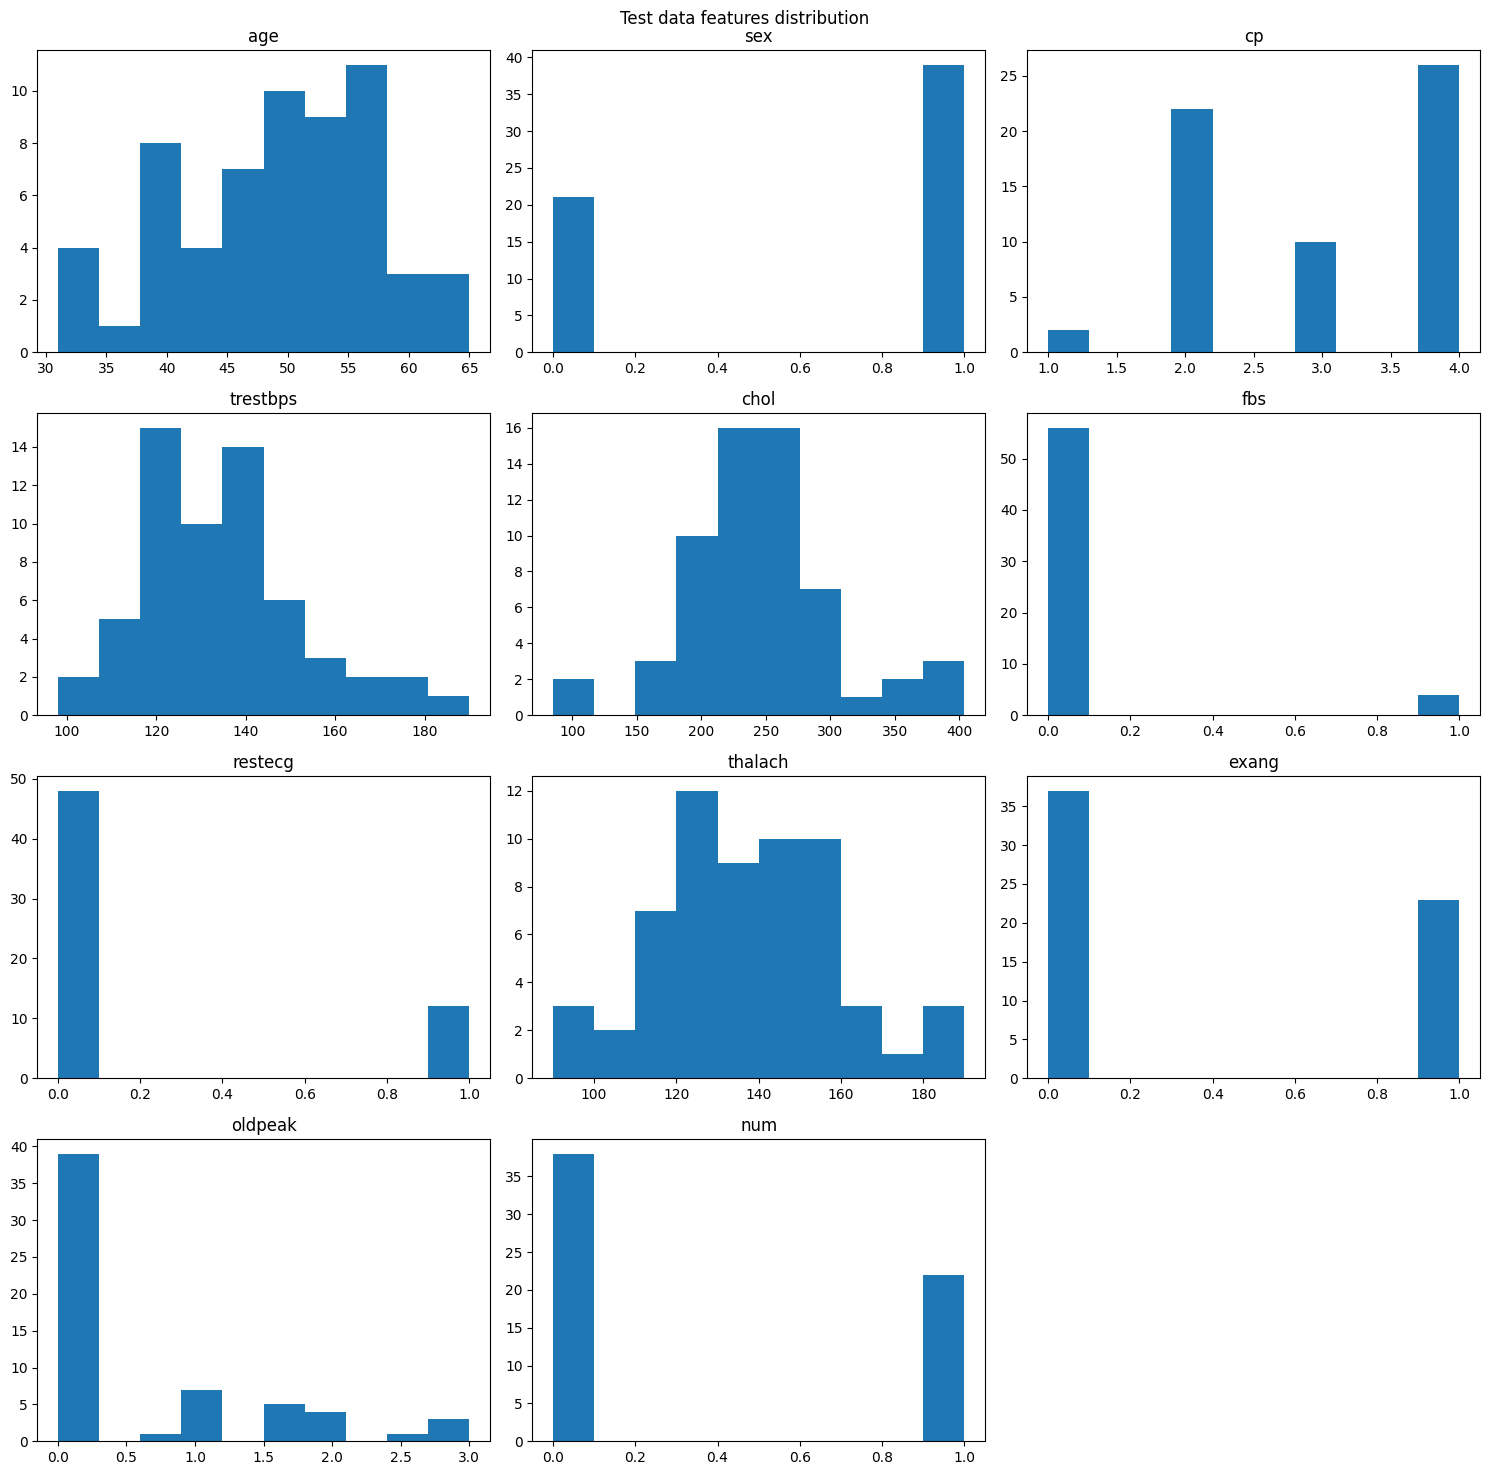

In [137]:
test_data.head()
feature = 0
fig, axs = plt.subplots(4,3,figsize=(15,15))
fig.suptitle('Test data features distribution')
for i in range(4):
  for j in range(3):
    axs[i][j].set_title(f'{test_data.columns[feature]}')
    axs[i][j].hist(np.asarray(test_data[test_data.columns[feature]] ,float))
    feature += 1
    if feature > 10:
      break

fig.delaxes(axs[3][2])
fig.tight_layout()

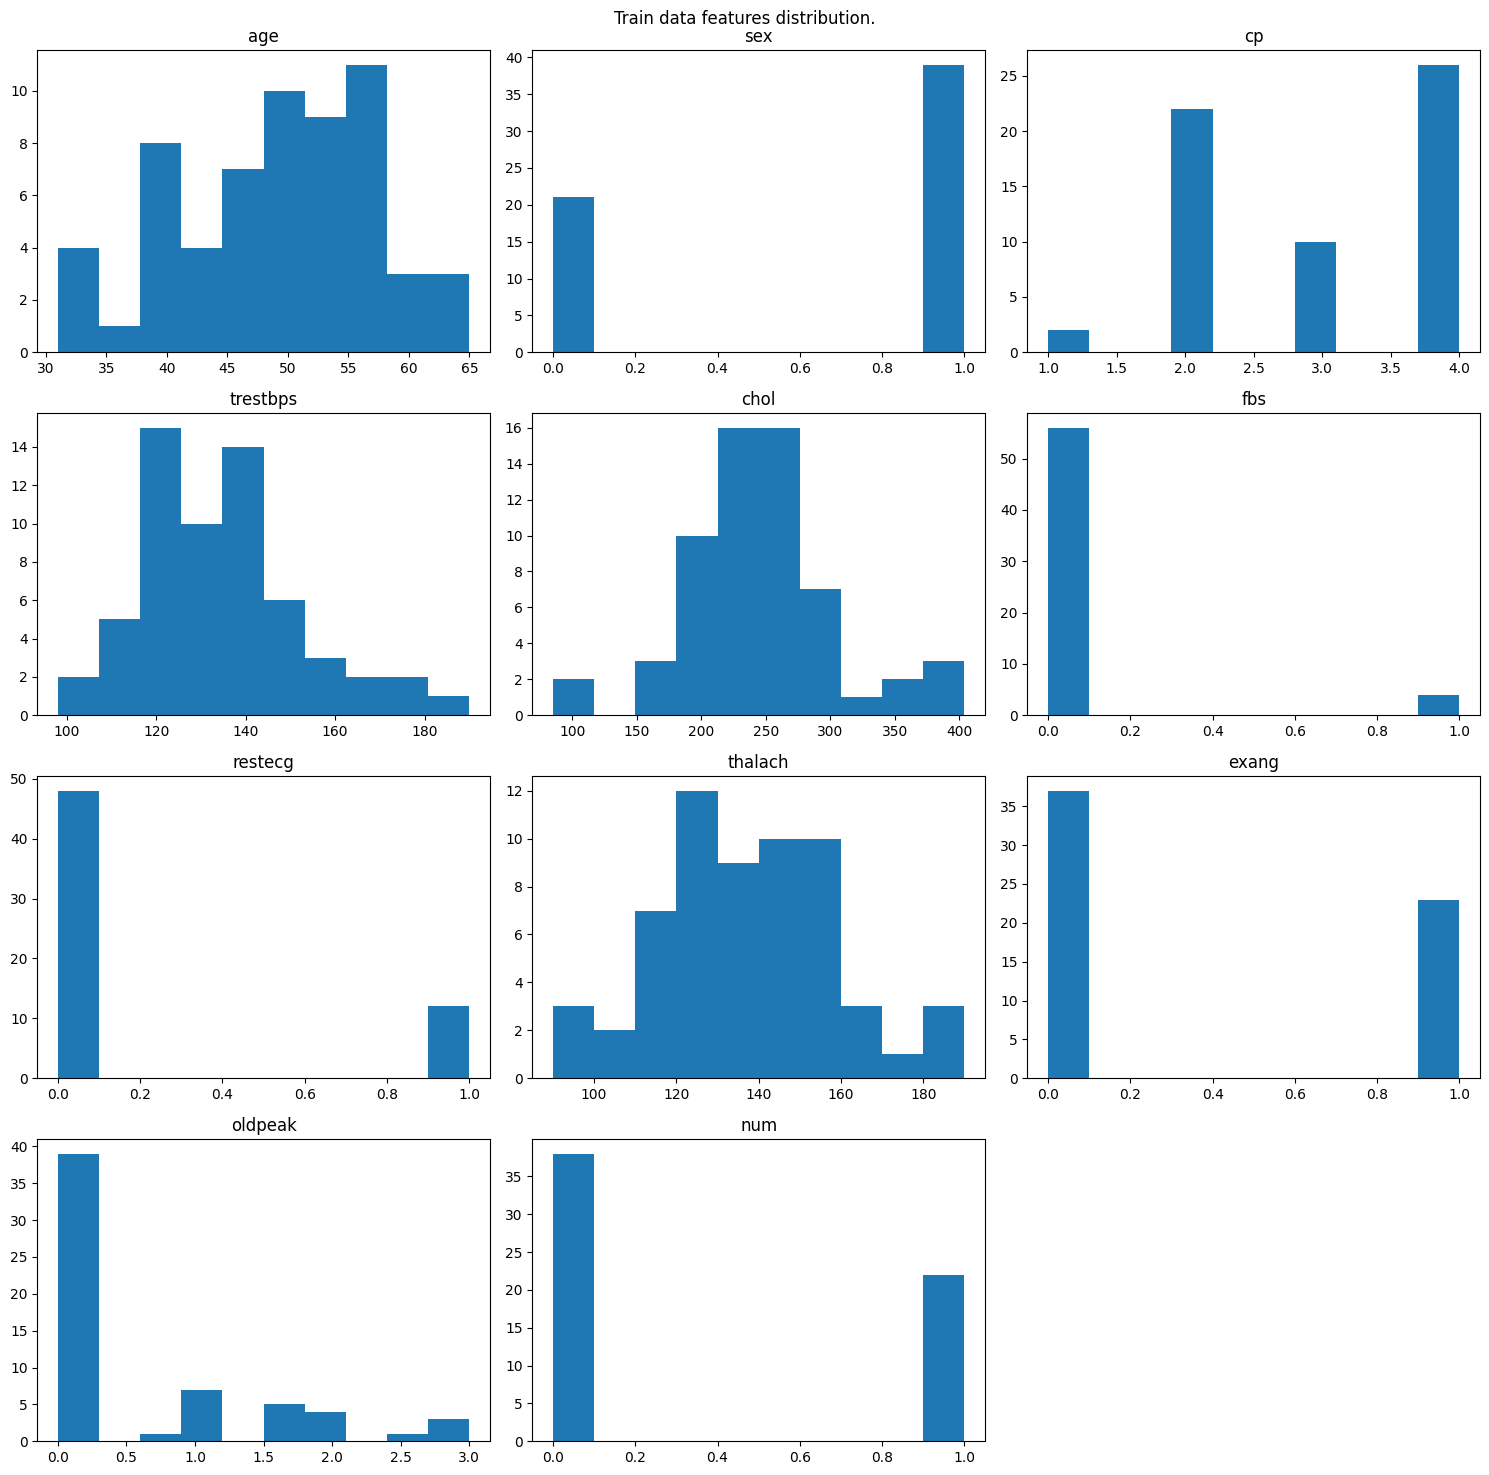

In [138]:
train_data.head()
feature = 0
fig, axs = plt.subplots(4,3,figsize=(15,15))
fig.suptitle('Train data features distribution.')
for i in range(4):
  for j in range(3):
    axs[i][j].set_title(f'{train_data.columns[feature]}')
    axs[i][j].hist(np.asarray(test_data[train_data.columns[feature]], float))
    feature += 1
    if feature > 10:
      break

fig.delaxes(axs[3][2])
fig.tight_layout()

**B) Binary classifier using Logistic Regression using only the features: age, sex, cp, chol.**


*   Generate train and test splits of features and labels for given features.
*   Fit the logistic regression model.
*   Calculate fpr, tpr, precision and recall.
*   Plot ROC and precision-recall curve.



In [139]:
def generate_plots(fpr, tpr, recall, precision, roc_auc, average_precision):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  axes[0].set_xlabel('False Positive Rate')
  axes[0].set_ylabel('True Positive Rate')
  axes[0].set_title('ROC Curve')
  axes[0].legend(loc="lower right")

  axes[1].step(recall, precision, color='b', alpha=0.2, where='post')
  axes[1].fill_between(recall, precision, step='post', alpha=0.2, color='b')
  axes[1].set_xlabel('Recall')
  axes[1].set_ylabel('Precision')
  axes[1].set_title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))

  plt.tight_layout()

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

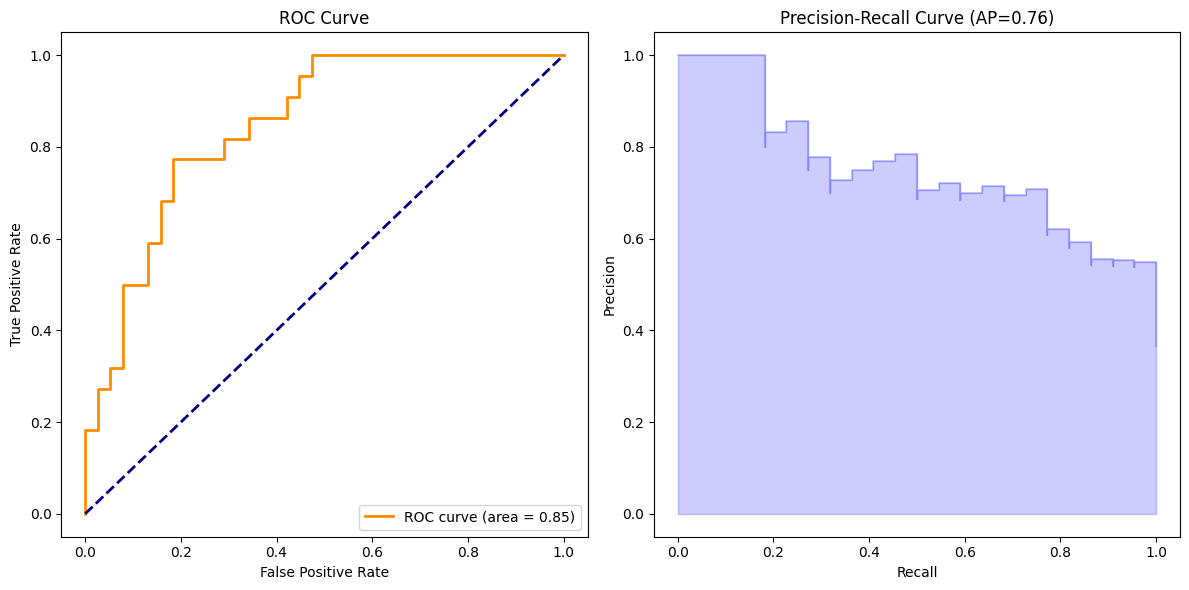

In [140]:
selected = ['age','sex','cp','chol']
target = 'num'

train_1 = train_data[selected + [target]].dropna()
test_1 = test_data[selected + [target]].dropna()

x_train_1 = train_1[selected]
x_test_1 = test_1[selected]
y_train_1 = train_1[target]
y_test_1 = test_1[target]

model = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))
model.fit(x_train_1, y_train_1)

y_score = model.predict_proba(x_test_1)

fpr, tpr, _ = roc_curve(y_test_1.ravel(), y_score[:, 1].ravel())
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_1.ravel(), y_score[:, 1].ravel())
average_precision = average_precision_score(y_test_1.ravel(), y_score[:, 1].ravel())

generate_plots(fpr,tpr,recall,precision,roc_auc,average_precision)

**C) Binary classifier using Logistic Regression using only the features: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak.**


*   Generate train and test splits of features and labels for given features.
*   Fit the logistic regression model.
*   Calculate fpr, tpr, precision and recall.
*   Plot ROC and precision-recall curve.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

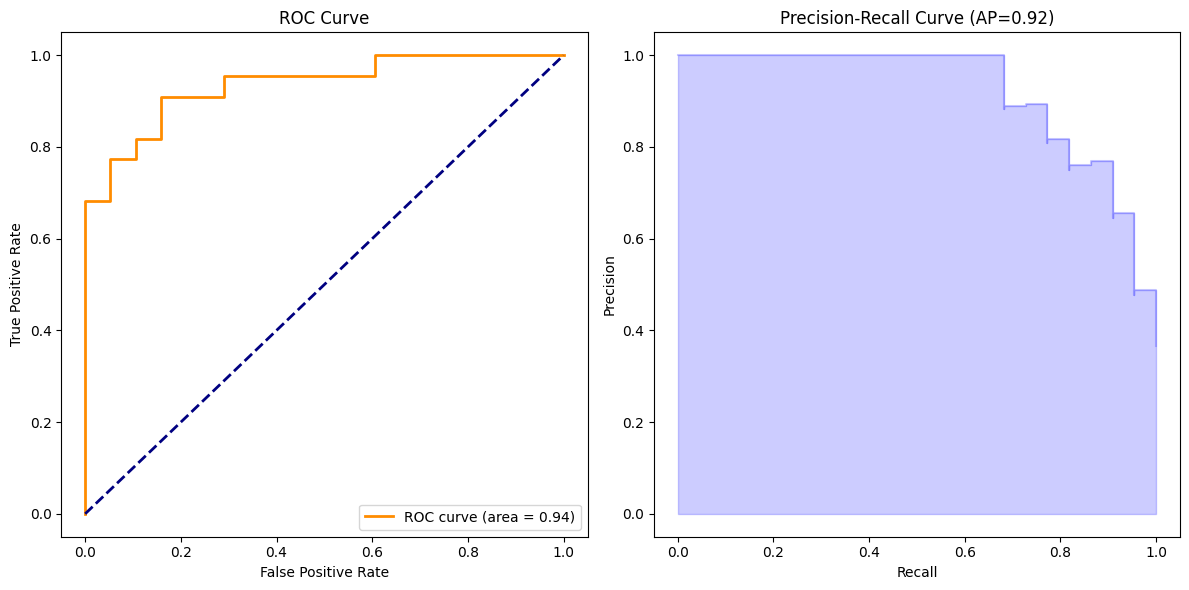

In [141]:
selected = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']
target = 'num'

train_2 = train_data[selected + [target]].dropna()
test_2 = test_data[selected + [target]].dropna()

x_train_2 = train_2[selected]
x_test_2 = test_2[selected]
y_train_2 = train_2[target]
y_test_2 = test_2[target]

model = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression(max_iter=1000))
model.fit(x_train_2, y_train_2)

y_score = model.predict_proba(x_test_2)

fpr, tpr, _ = roc_curve(y_test_2.ravel(), y_score[:, 1].ravel())
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_2.ravel(), y_score[:, 1].ravel())
average_precision = average_precision_score(y_test_2.ravel(), y_score[:, 1].ravel())

generate_plots(fpr,tpr,recall,precision,roc_auc,average_precision)